In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("cluster.csv")
df = df.rename(columns={"CustomerID":"ID","Annual Income (k$)":"income","Spending Score (1-100)":"score"})
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      200 non-null    int64 
 1   Gender  200 non-null    object
 2   Age     200 non-null    int64 
 3   income  200 non-null    int64 
 4   score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


,ID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df["Gender"])
df["Gender"] = label

df["Gender"].value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
cdf = df[["income","score"]]
cdf_val = cdf.values
scale = StandardScaler()
data = scale.fit_transform(cdf_val)
cdf = pd.DataFrame(data,columns=cdf.columns)
cdf

,income,score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


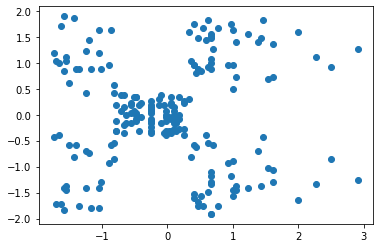

In [6]:
plt.scatter(cdf["income"],cdf["score"])

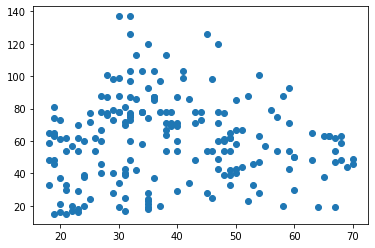

In [7]:
plt.scatter(df["Age"],df["income"])

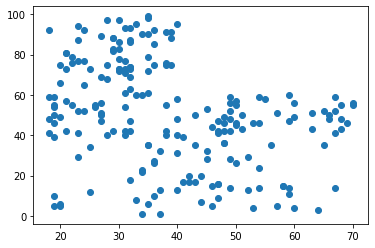

In [8]:
plt.scatter(df["Age"],df["score"])

# K-means

In [9]:
from sklearn.cluster import KMeans
k_mean = KMeans(init="k-means++",n_clusters=5,n_init=12,random_state=42)
k_mean.fit(cdf)
lab = k_mean.labels_
print(lab)
center = k_mean.cluster_centers_
print("center:",center)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 1 4 2 4 2 4 1 4 2 4 2 4 2 4 2 4 1 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]
center: [[-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]
 [ 0.99158305  1.23950275]]


In [10]:
cdf["cluster"] = lab
cdf
df["cluster"] = lab

In [11]:
print(cdf.groupby("cluster").count())
print("--"*50)
print(df.groupby("cluster").mean())


         income  score
cluster               
0            22     22
1            81     81
2            35     35
3            23     23
4            39     39
----------------------------------------------------------------------------------------------------
                 ID    Gender        Age     income      score
cluster                                                       
0         23.090909  0.409091  25.272727  25.727273  79.363636
1         86.320988  0.407407  42.716049  55.296296  49.518519
2        164.371429  0.542857  41.114286  88.200000  17.114286
3         23.000000  0.391304  45.217391  26.304348  20.913043
4        162.000000  0.461538  32.692308  86.538462  82.128205


Text(0, 0.5, 'Score')

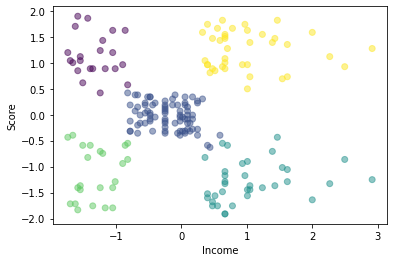

In [12]:
cdf_val = cdf.values
cdf_val
df_val = df.values
#area = np.pi*(cdf_val[:,2])**2*10
plt.scatter(cdf_val[:,0],cdf_val[:,1],c=lab.astype(np.float),alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Score")

# agglomerative and hierarchical

In [13]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering


In [14]:
dff = pd.read_csv("cluster.csv")
dff.head()
dff = dff.rename(columns={"CustomerID":"ID","Annual Income (k$)":"income","Spending Score (1-100)":"score"})
dff.head()
print(dff["Gender"].value_counts())

Female    112
Male       88
Name: Gender, dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df["Gender"])
dff["Gender"] = label

dff["Gender"].value_counts()
dff.head()


,ID,Gender,Age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [16]:
cdf2 = dff[["income","score"]]
from sklearn.preprocessing import MinMaxScaler
x = cdf2.values
min_max = MinMaxScaler()
mtx = min_max.fit_transform(x)
mtx

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

In [17]:
from sklearn.preprocessing import normalize
nr = normalize(x)
nr

array([[0.35897908, 0.93334561],
       [0.18208926, 0.983282  ],
       [0.93632918, 0.35112344],
       [0.20344646, 0.97908607],
       [0.39114064, 0.92033092],
       [0.21828984, 0.97588398],
       [0.9486833 , 0.31622777],
       [0.18807227, 0.98215519],
       [0.98776297, 0.15596257],
       [0.25515426, 0.96690036],
       [0.80505584, 0.59319904],
       [0.18847945, 0.98207713],
       [0.8       , 0.6       ],
       [0.25139836, 0.9678837 ],
       [0.83844362, 0.54498835],
       [0.24542187, 0.96941637],
       [0.51449576, 0.85749293],
       [0.30320366, 0.95292578],
       [0.62139471, 0.78349768],
       [0.22848559, 0.97354729],
       [0.56552836, 0.82472885],
       [0.31232107, 0.9499766 ],
       [0.98058068, 0.19611614],
       [0.32399297, 0.94605949],
       [0.89442719, 0.4472136 ],
       [0.32314385, 0.94634986],
       [0.65850461, 0.75257669],
       [0.41716766, 0.90882955],
       [0.68315713, 0.73027141],
       [0.31622777, 0.9486833 ],
       [0.

In [18]:
di = distance_matrix(nr,nr)
di

array([[0.        , 0.1838033 , 0.81994865, ..., 0.65998606, 1.02224791,
        0.64706458],
       [0.1838033 , 0.        , 0.98412515, ..., 0.83070032, 1.17590207,
        0.81824409],
       [0.81994865, 0.98412515, 0.        , ..., 0.17204653, 0.22763771,
        0.18566375],
       ...,
       [0.65998606, 0.83070032, 0.17204653, ..., 0.        , 0.39772238,
        0.01367192],
       [1.02224791, 1.17590207, 0.22763771, ..., 0.39772238, 0.        ,
        0.41111194],
       [0.64706458, 0.81824409, 0.18566375, ..., 0.01367192, 0.41111194,
        0.        ]])

In [19]:
hi = hierarchy.linkage(di,"complete")
clusteres = hierarchy.fcluster(hi,3,criterion="distance")
clusteres


<ipython-input-19-483e3b5376e0>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hi = hierarchy.linkage(di,"complete")


array([4, 3, 7, 3, 4, 3, 2, 3, 2, 3, 8, 3, 8, 3, 8, 3, 5, 4, 6, 3, 5, 4,
       2, 4, 7, 4, 6, 4, 6, 4, 2, 4, 2, 4, 7, 4, 7, 4, 8, 4, 6, 4, 6, 5,
       8, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 8, 6, 6, 8, 6, 6, 6, 6, 8, 6, 6, 8, 8, 6, 8, 6, 6,
       6, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 5, 7, 6, 7, 5, 2, 6, 2, 6,
       7, 6, 1, 6, 1, 6, 2, 6, 1, 6, 7, 6, 2, 6, 7, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 1, 6, 1, 6, 7, 6, 1, 6, 2, 6, 2, 6, 2, 8, 2, 8, 2, 6, 2, 6,
       2, 8, 2, 6, 2, 6, 2, 6, 7, 6, 2, 8, 2, 8, 2, 8, 1, 8, 2, 8, 2, 8,
       2, 8], dtype=int32)

In [20]:
mc = hierarchy.fcluster(hi,5,criterion="maxclust")
mc

array([2, 2, 4, 2, 2, 2, 1, 2, 1, 2, 5, 2, 5, 2, 5, 2, 3, 2, 3, 2, 3, 2,
       1, 2, 4, 2, 3, 2, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2, 5, 2, 3, 2, 3, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 5, 3, 3, 5, 3, 3, 3, 3, 5, 3, 3, 5, 5, 3, 5, 3, 3,
       3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 4, 3, 4, 3, 1, 3, 1, 3,
       4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 5, 1, 5, 1, 3, 1, 3,
       1, 5, 1, 3, 1, 3, 1, 3, 4, 3, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5], dtype=int32)

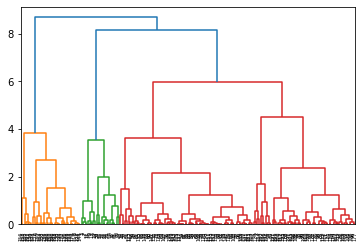

In [21]:
dend = hierarchy.dendrogram(hi)


In [22]:
dist = distance_matrix
agg = AgglomerativeClustering(n_clusters=5,linkage="complete")
agg.fit(di)
label = agg.labels_
print(label)

cdf2["cluster"] = label

[2 2 4 2 2 2 0 2 0 2 3 2 3 2 3 2 1 2 1 2 1 2 0 2 4 2 1 2 1 2 0 2 0 2 4 2 4
 2 3 2 1 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1
 3 1 1 1 1 3 1 1 3 3 1 3 1 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3 3 3 3
 3 3 3 3 3 3 1 3 3 3 3 3 1 4 1 4 1 0 1 0 1 4 1 0 1 0 1 0 1 0 1 4 1 0 1 4 1
 0 1 0 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1 0 1 0 3 0 3 0 1 0 1 0 3 0 1 0 1 0 1 4
 1 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


E:\anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
<ipython-input-22-55632905a118>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf2["cluster"] = label


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'SCORE')

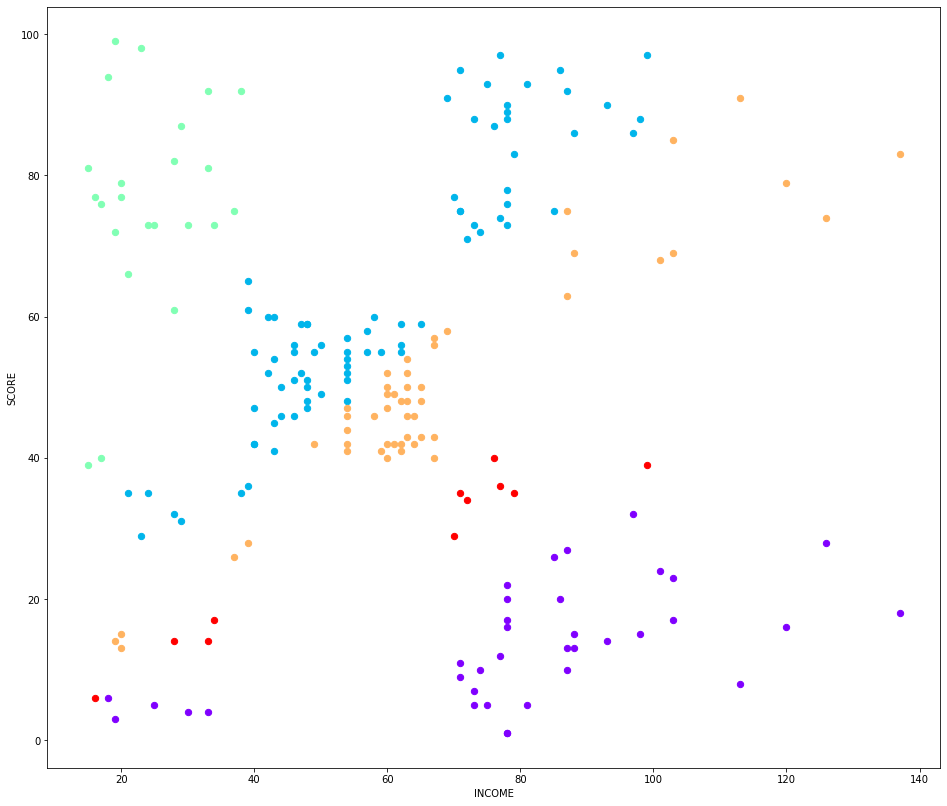

In [23]:
import matplotlib.cm as cm
n_clusters = max(label)+1
colors = cm.rainbow(np.linspace(0,1,n_clusters))
cluster_label = list(range(0,n_clusters))
plt.figure(figsize=(16,14))

for c,l in zip(colors,cluster_label):
    subset = (cdf2[cdf2["cluster"]==l])
    plt.scatter(subset.income,subset.score,s=40,c=c,label="cluster")
    

plt.xlabel("INCOME")
plt.ylabel("SCORE")
        

In [24]:
dff["cluster"] = label
print(cdf2.groupby("cluster").count())
print("--"*50)
print("mean: ",dff.groupby("cluster").mean())
print("--"*50)
print("count: ",dff.groupby("cluster").count())

         income  score
cluster               
0            36     36
1            80     80
2            23     23
3            50     50
4            11     11
----------------------------------------------------------------------------------------------------
mean:                   ID    Gender        Age     income      score
cluster                                                       
0        145.500000  0.583333  42.472222  80.194444  13.388889
1         96.150000  0.412500  40.012500  58.362500  62.750000
2         20.347826  0.434783  25.304348  24.304348  76.521739
3        111.620000  0.440000  40.580000  66.840000  49.580000
4        101.909091  0.181818  39.000000  59.545455  27.181818
----------------------------------------------------------------------------------------------------
count:           ID  Gender  Age  income  score
cluster                                
0        36      36   36      36     36
1        80      80   80      80     80
2        23      23  

# DBSCAN

In [25]:
from sklearn.cluster import DBSCAN
cluster_df = pd.read_csv("cluster.csv")
cluster_df = cluster_df.rename(columns={"CustomerID":"ID","Annual Income (k$)":"income","Spending Score (1-100)":"score"})
cluster_df.info()
cluster_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      200 non-null    int64 
 1   Gender  200 non-null    object
 2   Age     200 non-null    int64 
 3   income  200 non-null    int64 
 4   score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


,ID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df["Gender"])
cluster_df["Gender"] = label

cluster_df["Gender"].value_counts()
cluster_df.head()

,ID,Gender,Age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [27]:
from sklearn.preprocessing import StandardScaler
pdf = cluster_df[["income","score"]]
pdf_val = pdf.values
scaler = StandardScaler()
data2 = scale.fit_transform(pdf_val)
pdf = pd.DataFrame(data2,columns=pdf.columns)
pdf

,income,score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


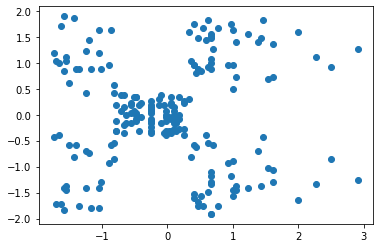

In [28]:
plt.scatter(pdf["income"],pdf["score"])

In [29]:
db = DBSCAN(eps=0.3,min_samples=6)
db.fit(data2)
labels = db.labels_
labels

array([ 1,  0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  1,
        0,  1, -1,  1,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  2, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  5,  3,  5,  3,  5, -1,
        5,  3,  5,  3,  5, -1,  5,  3,  5, -1, -1, -1,  5, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32)

In [30]:
rang = plt.cm.Spectral(np.linspace(0,1,len(set(labels))))
pdf["cluster"] = labels

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

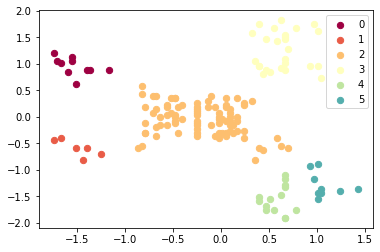

In [31]:
n_clusters = max(labels)+1
cluster_label = list(range(0,n_clusters))
for c,l in zip(rang,cluster_label):
    subset = (pdf[pdf["cluster"]==l])
    plt.scatter(subset.income,subset.score,s=40,c=c,label="cluster")
    plt.legend(set(labels))

In [32]:
cluster_df["cluster"] = labels


print(pdf.groupby("cluster").count())
print("--"*50)
print("mean: ",cluster_df.groupby("cluster").mean())
print("--"*50)
print("count: ",cluster_df.groupby("cluster").count())

         income  score
cluster               
-1           48     48
 0           10     10
 1            6      6
 2           87     87
 3           26     26
 4           14     14
 5            9      9
----------------------------------------------------------------------------------------------------
mean:                   ID    Gender        Age     income      score
cluster                                                       
-1       100.458333  0.354167  37.208333  64.250000  49.958333
 0        14.800000  0.500000  23.900000  20.700000  74.700000
 1        15.000000  0.500000  36.166667  21.333333  35.000000
 2        86.839080  0.402299  42.804598  55.413793  48.816092
 3       149.307692  0.461538  32.923077  77.307692  82.461538
 4       146.000000  0.642857  37.785714  75.928571  10.071429
 5       173.222222  0.777778  46.555556  88.777778  17.000000
----------------------------------------------------------------------------------------------------
count:           

# MeanShift


In [33]:
from sklearn.cluster import MeanShift
ms = cluster_df
ms = ms.drop("cluster",axis=1)
ms

,ID,Gender,Age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [34]:
from sklearn.preprocessing import StandardScaler
pdf2 = ms[["income","score"]]
pdf2_val = pdf.values
scaler = StandardScaler()
data3 = scale.fit_transform(pdf_val)
pdf2 = pd.DataFrame(data3,columns=pdf2.columns)
pdf2

,income,score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


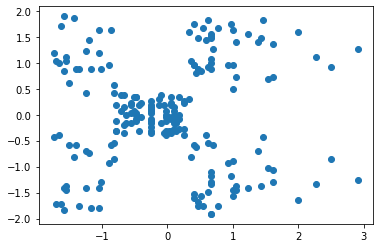

In [35]:
plt.scatter(pdf2["income"],pdf2["score"])

In [36]:
mean_shift = MeanShift(bandwidth=0.9)
mean_shift.fit(data3)
lab2 = mean_shift.labels_
lab2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [37]:
rang2 = plt.cm.Spectral(np.linspace(0,1,len(set(lab2))))
pdf2["cluster"] = lab2

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

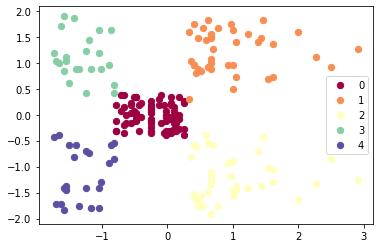

In [38]:
n_clusters = max(labels)+1
cluster_label = list(range(0,n_clusters))
for c,l in zip(rang2,cluster_label):
    subset = (pdf2[pdf2["cluster"]==l])
    plt.scatter(subset.income,subset.score,s=40,c=c,label=set(lab2))
    plt.legend(set(lab2))

In [39]:
ms["cluster"] = lab2
print(pdf2.groupby("cluster").count())
print("--"*50)
print("mean: ",ms.groupby("cluster").mean())
print("--"*50)
print("count: ",ms.groupby("cluster").count())

         income  score
cluster               
0            76     76
1            40     40
2            38     38
3            23     23
4            23     23
----------------------------------------------------------------------------------------------------
mean:                ID    Gender        Age     income      score
cluster                                                    
0         84.500  0.421053  43.328947  54.631579  49.776316
1        161.025  0.450000  32.875000  86.100000  81.525000
2        162.000  0.526316  40.394737  87.000000  18.631579
3         24.000  0.391304  25.521739  26.304348  78.565217
4         23.000  0.391304  45.217391  26.304348  20.913043
----------------------------------------------------------------------------------------------------
count:           ID  Gender  Age  income  score
cluster                                
0        76      76   76      76     76
1        40      40   40      40     40
2        38      38   38      38     38
3 